In this notebook, we will use the Bonsai Custom Assessments to analyze our results. To learn more about Bonsai custom assessments, use [these documents](https://docs.microsoft.com/en-us/bonsai/guides/assess-brain).

### Imports

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import Video

### Load Kqlmagic Extension

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


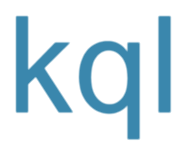

In [2]:
%reload_ext Kqlmagic
%config Kqlmagic.display_limit = 5 #limiting the number of rows displayed (full rows will still be stored)

### Login to the log analytics workspace

In [3]:
LOG_ANALYTICS_WORKSPACE_ID = # enter your log analytics workspace id
ALIAS =  # add your alias. Can be anything, but should not be empty
%kql loganalytics://code;workspace=LOG_ANALYTICS_WORKSPACE_ID;alias=ALIAS

<IPython.core.display.Javascript object>

## Import custom assessment data

In [4]:
brain_name = # add your brain_name
brain_version = # add your brain version
assessment_name = # add your assessment name

In [5]:
%%kql
let _brain_name = brain_name;
let _brain_version = brain_version;
let _assessment_name = assessment_name;
EpisodeLog_CL
  | where BrainName_s == _brain_name and BrainVersion_d == _brain_version and AssessmentName_s == _assessment_name
  | join kind=inner (
      IterationLog_CL
      | sort by Timestamp_t desc
  ) on EpisodeId_g
  | project 
      AssessmentName = AssessmentName_s,
      EpisodeId = EpisodeId_g,
      IterationIndex = IterationIndex_d,
      Timestamp = Timestamp_t,
      SimConfig = parse_json(SimConfig_s),
      SimState = parse_json(SimState_s),
      SimAction = parse_json(SimAction_s),
      Reward = Reward_d,
      CumulativeReward = CumulativeReward_d,
      GoalMetrics = parse_json(GoalMetrics_s),
      Terminal = Terminal_b,
      FinishReason = FinishReason_s,
      LessonIndex = LessonIndex_d,
      EpisodeType = EpisodeType_s
  | order by EpisodeId asc, IterationIndex asc


AssessmentName,EpisodeId,IterationIndex,Timestamp,SimConfig,SimState,SimAction,Reward,CumulativeReward,GoalMetrics,Terminal,FinishReason,LessonIndex,EpisodeType
custom_assessment_2,01678536-ee4d-44bc-92c7-a56bff386fb5,1,2021-08-11 17:55:07.068000+00:00,"{'interval_downtime_event_dev': 20, 'interval_downtime_event_mean': 100, 'layout_configuration': 1, 'control_frequency': 1, 'down_machine_index': 3, 'downtime_event_duration_dev': 5, 'dischargeProx_index1': 0, 'machine_initial_speed': 100, 'discharge_prox_lower_limit': 10, 'dischargeProx_index2': 2, 'infeedProx_index2': 3, 'conveyor_capacity': 1000, 'bin_maximum_capacity': 100, 'control_type': 0, 'infeed_prox_lower_limit': 10, 'initial_bin_level': 57.25888675714004, 'infeedProx_index1': 1, 'num_conveyor_bins': 10, 'simulation_time_step': 1, 'downtime_event_duration_mean': 15, 'discharge_prox_upper_limit': 10, 'infeed_prox_upper_limit': 10, 'machine_min_speed': 1, 'number_parallel_downtime_events': 1, 'machine_max_speed': 100}","{'machines_actual_speed': [100, 100, 100, 100, 100, 100], 'machines_state': [1, 1, 1, 1, 1, 1], 'brain_speed': [100, 100, 100, 100, 100, 100], 'machines_state_sum': 6, 'idle_count': 0, 'down_count': 0, 'iteration_count': 1, 'down_duration': 13, 'conveyors_speed': [1000, 1000, 1000, 1000, 1000], 'conveyors_state': ['active', 'active', 'active', 'active', 'active'], 'conveyor_buffers': [[0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100]], 'conveyor_buffers_previous': [[0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100]], 'conveyor_buffers_full': [[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]], 'conveyors_level': [572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004], 'conveyors_previous_level': [572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004], 'sink_machines_rate': [100], 'sink_machines_rate_sum': 100, 'sink_throughput_delta': [0], 'sink_throughput_delta_sum': 0, 'sink_throughput_absolute_sum': 0, 'conveyor_infeed_m1_prox_empty': [0, 0, 0, 0, 0], 'conveyor_infeed_m2_prox_empty': [0, 0, 0, 0, 0], 'conveyor_discharge_p1_prox_full': [0, 0, 0, 0, 0], 'conveyor_discharge_p2_prox_full': [0, 0, 0, 0, 0], 'conveyor_previous_infeed_m1_prox_empty': [0, 0, 0, 0, 0], 'conveyor_previous_infeed_m2_prox_empty': [0, 0, 0, 0, 0], 'conveyor_previous_discharge_p1_prox_full': [0, 0, 0, 0, 0], 'conveyor_previous_discharge_p2_prox_full': [0, 0, 0, 0, 0], 'illegal_machine_actions': [0, 0, 0, 0, 0, 0], 'remaining_downtime_machines': [0, 0, 0, 0, 0, 0], 'control_delta_t': 0, 'env_time': 0, 'all_conveyor_levels': [572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004]}",None,0,35.2915000915527,{},False,Interrupted,0,Assessment
custom_assessment_2,01678536-ee4d-44bc-92c7-a56bff386fb5,2,2021-08-11 17:55:07.095000+00:00,"{'interval_downtime_event_dev': 20, 'interval_downtime_event_mean': 100, 'layout_configuration': 1, 'control_frequency': 1, 'down_machine_index': 3, 'downtime_event_duration_dev': 5, 'dischargeProx_index1': 0, 'machine_initial_speed': 100, 'discharge_prox_lower_limit': 10, 'dischargeProx_index2': 2, 'infeedProx_index2': 3, 'conveyor_capacity': 1000, 'bin_maximum_capacity': 100, 'control_type': 0, 'infeed_prox_lower_limit': 10, 'initial_bin_level': 57.25888675714004, 'infeedProx_index1': 1, 'num_conveyor_bins': 10, 'simulation_time_step': 1, 'downtime_event_duration_

[{'AssessmentName': 'custom_assessment_2', 'EpisodeId': '01678536-ee4d-44bc-92c7-a56bff386fb5', 'IterationIndex': 1, 'Timestamp': datetime.datetime(2021, 8, 11, 17, 55, 7, 68000, tzinfo=tzutc()), 'SimConfig': {'interval_downtime_event_dev': 20, 'interval_downtime_event_mean': 100, 'layout_configuration': 1, 'control_frequency': 1, 'down_machine_index': 3, 'downtime_event_duration_dev': 5, 'dischargeProx_index1': 0, 'machine_initial_speed': 100, 'discharge_prox_lower_limit': 10, 'dischargeProx_index2': 2, 'infeedProx_index2': 3, 'conveyor_capacity': 1000, 'bin_maximum_capacity': 100, 'control_type': 0, 'infeed_prox_lower_limit': 10, 'initial_bin_level': 57.25888675714004, 'infeedProx_index1': 1, 'num_conveyor_bins': 10, 'simulation_time_step': 1, 'downtime_event_duration_mean': 15, 'discharge_prox_upper_limit': 10, 'infeed_prox_upper_limit': 10, 'machine_min_speed': 1, 'number_parallel_downtime_events': 1, 'machine_max_speed': 100}, 'SimState': {'machines_actual_speed': [100, 100, 100, 100, 100, 100], 'machines_state': [1, 1, 1, 1, 1, 1], 'brain_speed': [100, 100, 100, 100, 100, 100], 'machines_state_sum': 6, 'idle_count': 0, 'down_count': 0, 'iteration_count': 1, 'down_duration': 13, 'conveyors_speed': [1000, 1000, 1000, 1000, 1000], 'conveyors_state': ['active', 'active', 'active', 'active', 'active'], 'conveyor_buffers': [[0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100]], 'conveyor_buffers_previous': [[0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100], [0, 0, 0, 0, 72.58886757140044, 100, 100, 100, 100, 100]], 'conveyor_buffers_full': [[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]], 'conveyors_level': [572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004], 'conveyors_previous_level': [572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004], 'sink_machines_rate': [100], 'sink_machines_rate_sum': 100, 'sink_throughput_delta': [0], 'sink_throughput_delta_sum': 0, 'sink_throughput_absolute_sum': 0, 'conveyor_infeed_m1_prox_empty': [0, 0, 0, 0, 0], 'conveyor_infeed_m2_prox_empty': [0, 0, 0, 0, 0], 'conveyor_discharge_p1_prox_full': [0, 0, 0, 0, 0], 'conveyor_discharge_p2_prox_full': [0, 0, 0, 0, 0], 'conveyor_previous_infeed_m1_prox_empty': [0, 0, 0, 0, 0], 'conveyor_previous_infeed_m2_prox_empty': [0, 0, 0, 0, 0], 'conveyor_previous_discharge_p1_prox_full': [0, 0, 0, 0, 0], 'conveyor_previous_discharge_p2_prox_full': [0, 0, 0, 0, 0], 'illegal_machine_actions': [0, 0, 0, 0, 0, 0], 'remaining_downtime_machines': [0, 0, 0, 0, 0, 0], 'control_delta_t': 0, 'env_time': 0, 'all_conveyor_levels': [572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004, 572.5888675714004]}, 'SimAction': None, 'Reward': 0, 'CumulativeReward': 35.2915000915527, 'GoalMetrics': {}, 'Terminal': False, 'FinishReason': 'Interrupted', 'LessonIndex': 0, 'EpisodeType': 'Assessment'},
 {'AssessmentName': 'custom_assessment_2', 'EpisodeId': '01678536-ee4d-44bc-92c7-a56bff386fb5', 'IterationIndex': 2, 'Timestamp': datetime.datetime(2021, 8, 11, 17, 55, 7, 95000, tzinfo=tzutc()), 'SimConfig': {'interval_downtime_event_dev': 20, 'interval_downtime_event_mean': 100, 'layout_configuration': 1, 'control_frequency': 1, 'down_machine_index': 3, 'downtime_event_duration_dev': 5, 'dischargeProx_index1': 0, 'machine_initial_speed': 100, 'discharge_prox_lower_limit': 10, 'dischargeProx_index2': 2, 'infeedProx_index2': 3, 'conveyor_capacity': 1000, 'bin_maxi

In [6]:
# convert kql query results in a dataframe
assessment_data = _kql_raw_result_.to_dataframe()

In [7]:
def format_kql_logs(df: pd.DataFrame) -> pd.DataFrame:
    ''' Function to format a dataframe obtained from KQL query.
        Output format: keeps only selected columns, and flatten nested columns [SimAction, SimState, SimConfig]

        Parameters
        ----------
        df : DataFrame
            dataframe obtained from running KQL query then exporting `_kql_raw_result_.to_dataframe()`
    '''
    selected_columns = ["Timestamp", "IterationIndex", "Reward", "CumulativeReward", "Terminal", "SimState", "SimAction", "SimConfig", "EpisodeId"]
    nested_columns =  [ "SimState", "SimAction", "SimConfig"]
    df_selected_columns = df[selected_columns]
    series_lst = []
    ordered_columns = ["EpisodeId", "IterationIndex", "Reward", "Terminal"]
    for i in nested_columns:
        new_series = df_selected_columns[i].apply(pd.Series)
        column_names = new_series.columns.values.tolist()
        series_lst.append(new_series)
        if len(column_names) > 0:
            ordered_columns.extend(column_names)
        del(df_selected_columns[i])

    series_lst.append(df_selected_columns)
    formated_df = pd.concat(series_lst, axis=1)
    formated_df = formated_df.sort_values(by='Timestamp',ascending=True) # reorder df based on Timestamp
    formated_df.index = range(len(formated_df)) # re-index
    formated_df['Timestamp']=pd.to_datetime(formated_df['Timestamp']) # convert Timestamp to datetime

    formated_df = formated_df[ordered_columns]
    
    return formated_df.sort_values(by=["EpisodeId", "IterationIndex"])


In [8]:
assessment_df_flattened = format_kql_logs(assessment_data)

In [9]:
episode = 0 # you can change which episode's results you'd like to view with this parameter
episode_id = assessment_df_flattened["EpisodeId"].unique()[episode]
single_episode_df = assessment_df_flattened[assessment_df_flattened["EpisodeId"] == episode_id]

### Machines and buffers visualization

In [10]:
def plot_line_for_iter(iter_count, df, position, node_sizes, ax, G):
    ax.clear()

    for key, val in position.items():
        if key == "source1":
            continue
        elif key == "sink":
            machine_speed = df.loc[iter_count, :]["machines_actual_speed"][-1]
            plt.text(val[0]-1.2, val[1] + 0.009,
                     'Throughput: ' + str(machine_speed), fontsize=7, color="green") # throughput at the end
        else:
            machine_id = int(key[1:])
            #print(machine_id)
            machine_speed = df.loc[iter_count, :]["machines_actual_speed"][machine_id]
            plt.text(val[0]-1.2, val[1] + 0.009,
                     'Speed: ' + str(machine_speed), fontsize=7, color="green") # machine speed
            if key != "m5": # there isn't a conveyor between sink and m5
                conveyor_buffer = df.loc[iter_count, :]["conveyor_buffers"][machine_id]
                plt.text(val[0] + 1.2, val[1] - 0.009,
                         'Buffer: ' + str(int(np.sum(conveyor_buffer))), fontsize=7, color="blue")
    nx.draw(G, nx.get_node_attributes(G, 'pos'),
            with_labels=True, node_size=node_sizes, font_size=8)

    ax.set_title(f"Iteration: {iter_count}")
    plt.tight_layout()


In [11]:
def simple_animation(df):
    max_iter = int(df["IterationIndex"].max())
    df_copy = df.copy()
    df_copy.set_index("IterationIndex", inplace=True)
    # position of the nodes in the graph
    position = {'source1': (0, 0.02), 'm0': (5, 0.02), 'm1': (10, 0.02), 'm2': (15, 0.02),
                'm3': (20, 0.02), 'm4': (25, 0.02), 'm5': (30, 0.02), 'sink': (35, 0.02)}

    # graph that will represent the manufacturing line
    G = nx.Graph()
    # connections between the nodes (machines)
    G.add_edges_from([("source1", "m0"), ("m0", "m1"), ("m1", "m2"),
                      ("m2", "m3"), ("m3", "m4"), ("m4", "m5"), ("m5", "sink")])
    node_sizes = [7500] * 8
    node_sizes = [node/8 for node in node_sizes]
    for key, val in position.items():
        G.add_node(str(key), pos=val)
    # Build plot
    fig, ax = plt.subplots(figsize=(6,4), dpi=100)

    ani = animation.FuncAnimation(fig, plot_line_for_iter, frames=range(1,max_iter+1), fargs=(df_copy, position, node_sizes, ax, G))
    ani.save('animation.mp4')

    plt.close()

simple_animation(single_episode_df)

In [12]:
from IPython.display import Video
Video('animation.mp4')

# Throughput and cumulative reward

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


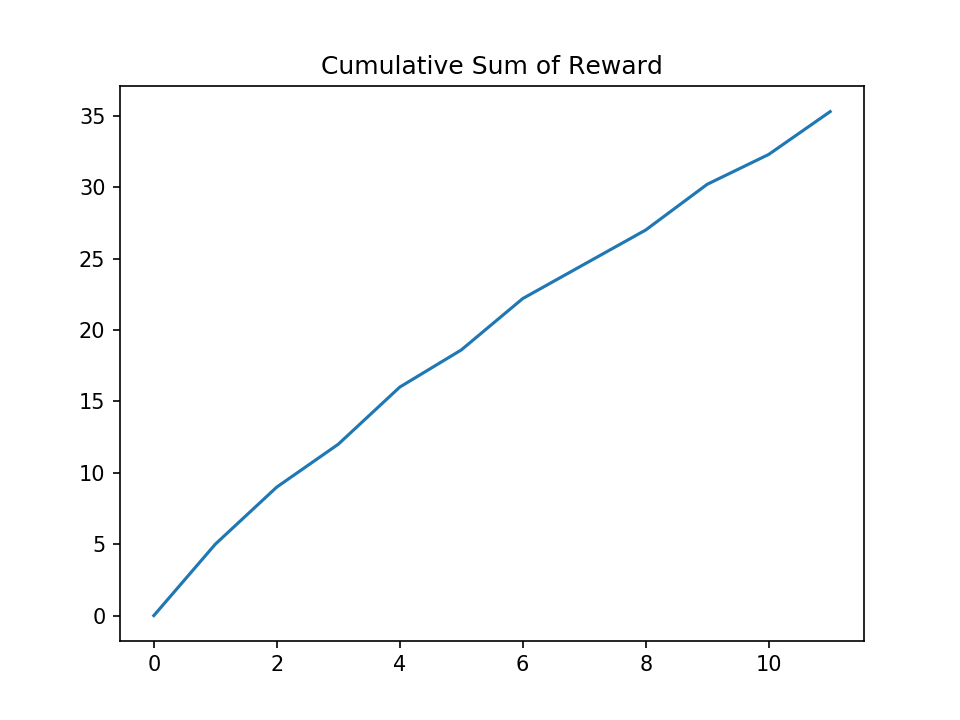

The cumulative reward at the end of the episode is: 35.2915003299713


In [14]:
reward = single_episode_df["Reward"]
cumulative_rew = np.cumsum(reward.to_numpy())
plt.plot(cumulative_rew)
plt.title("Cumulative Sum of Reward")
print(f"The cumulative reward at the end of the episode is: {cumulative_rew[-1]}")

<IPython.core.display.Javascript object>


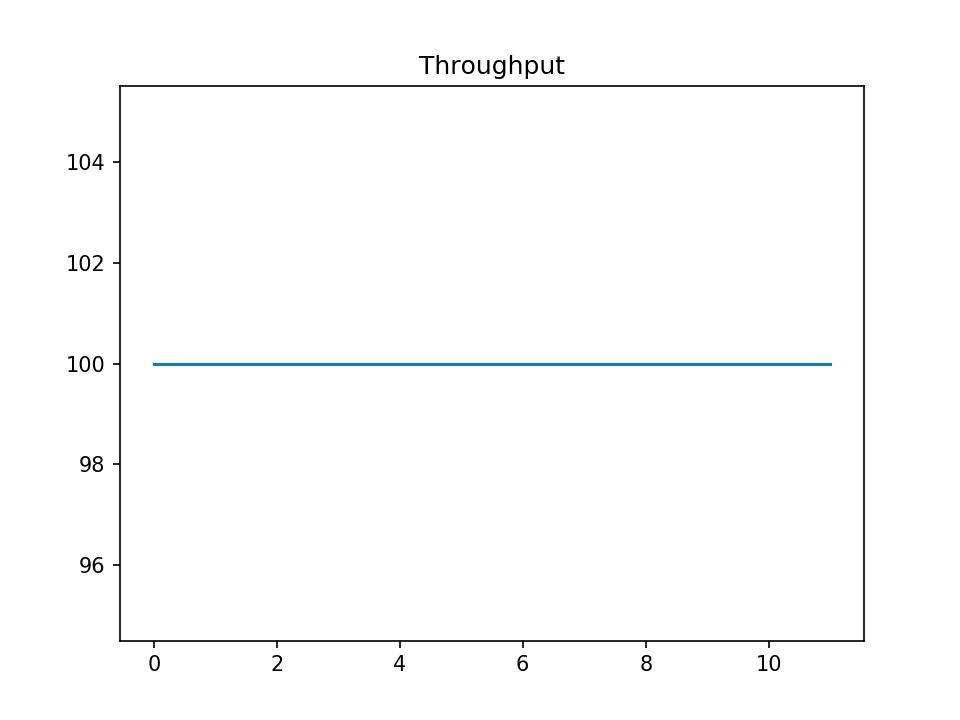

Text(0.5, 1.0, 'Throughput')

In [15]:
machines_speeds = np.array(single_episode_df["machines_actual_speed"].to_list())
plt.plot(machines_speeds[:, -1])
plt.title("Throughput")

In [16]:
print(f"The total number of products at the output of the line throughout the episode is: {np.sum(machines_speeds[:, -1])}")

The total number of products at the output of the line throughout the episode is: 1200


# Distributions of machine speeds and buffer sizes

<IPython.core.display.Javascript object>


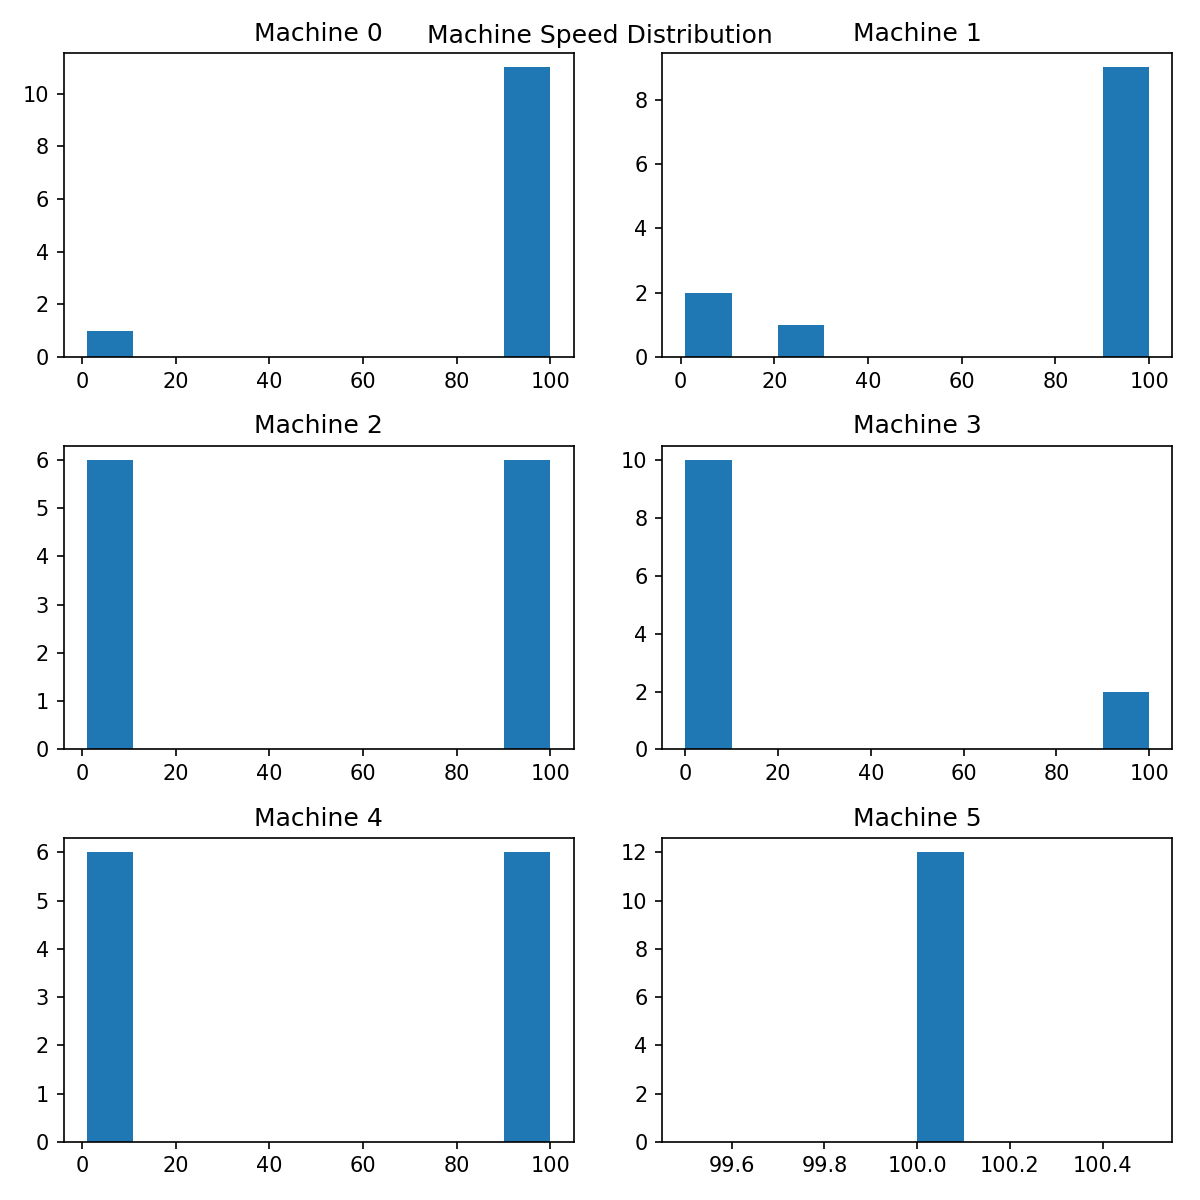

In [17]:
speeds = np.array(single_episode_df["machines_actual_speed"].to_list())
fig, axes = plt.subplots(3, 2, figsize=(8,8))
for i in range(6):
    ax = axes[i//2,i%2]
    ax.hist(speeds[:,i])
    ax.set_title(f"Machine {i}")
fig.suptitle('Machine Speed Distribution')
plt.tight_layout()

<IPython.core.display.Javascript object>


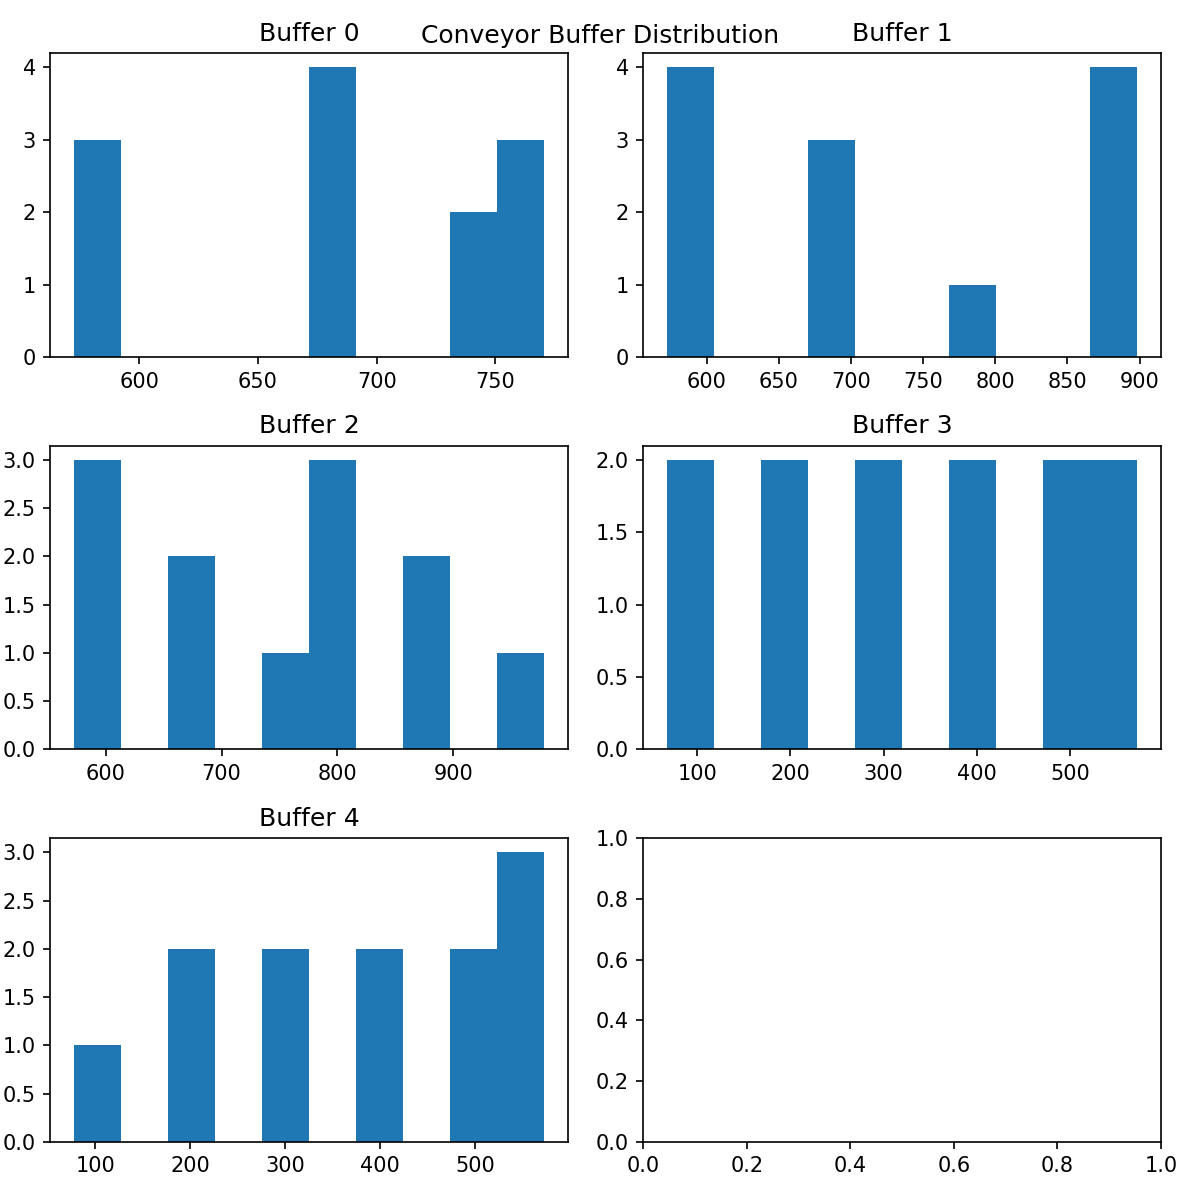

In [18]:
# machine buffer
buffers = np.array(single_episode_df["conveyor_buffers"].to_list())
fig, axes = plt.subplots(3, 2, figsize=(8,8))
for i in range(5):
    ax = axes[i//2,i%2]
    ax.hist(np.sum(buffers[:,i,:],axis=1))
    ax.set_title(f"Buffer {i}")
fig.suptitle('Conveyor Buffer Distribution')
plt.tight_layout()

<IPython.core.display.Javascript object>


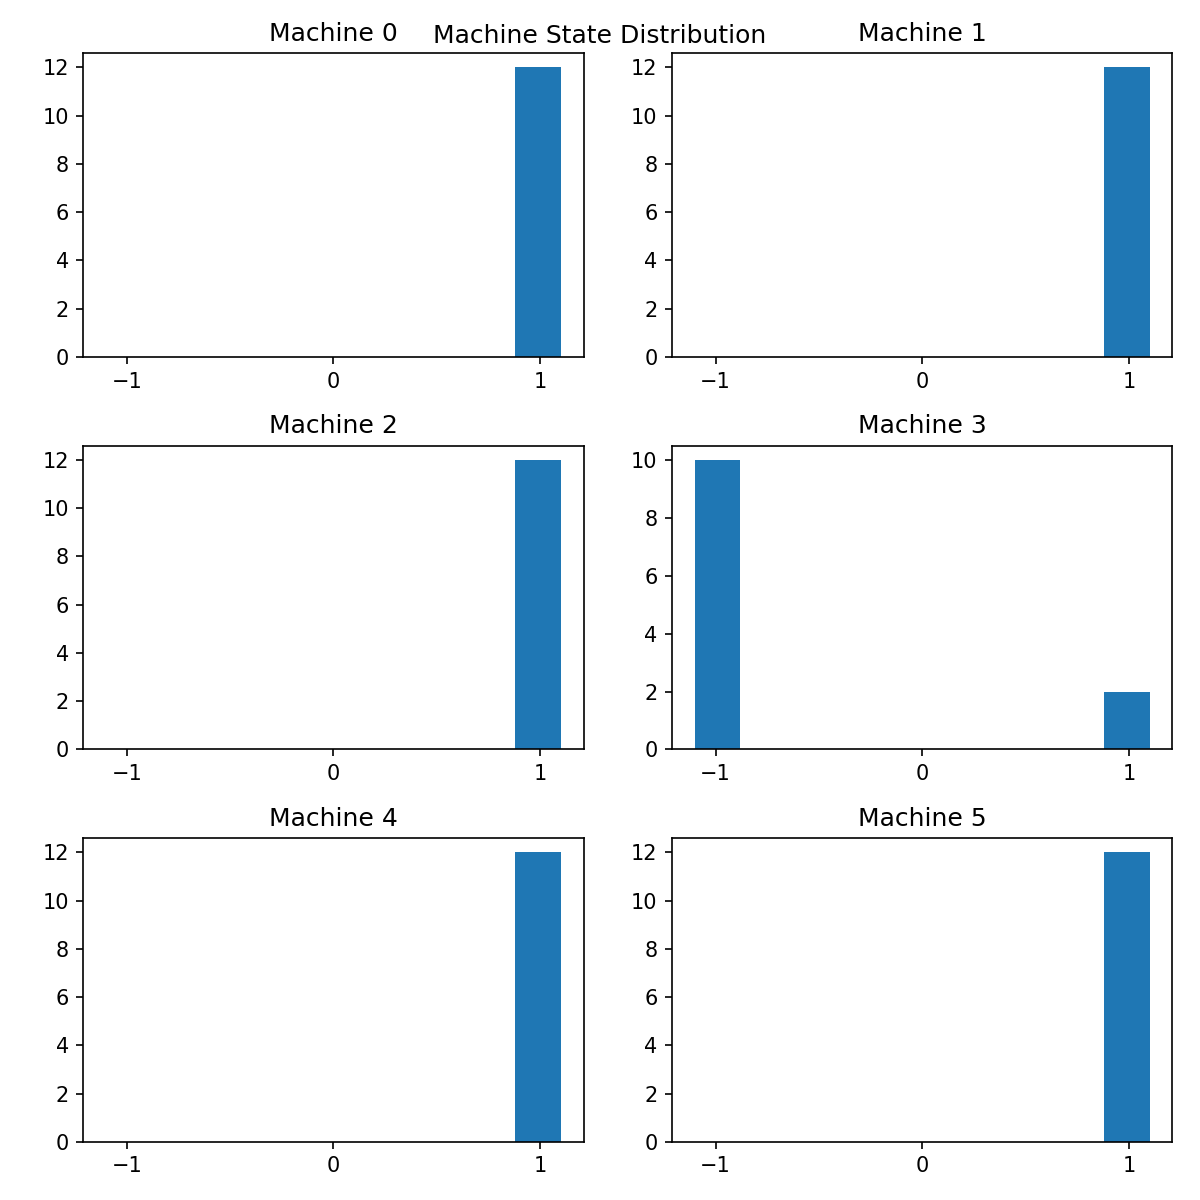

In [19]:
# machine states
machine_states = np.array(single_episode_df["machines_state"].to_list())
fig, axes = plt.subplots(3, 2, figsize=(8,8))
for i in range(6):
    ax = axes[i//2,i%2]
    ax.hist(machine_states[:,i], range=[-1.1, 1.1], align="mid")
    ax.set_title(f"Machine {i}")
    ax.set_xticks([-1, 0, 1])
fig.suptitle('Machine State Distribution')
plt.tight_layout()

<IPython.core.display.Javascript object>


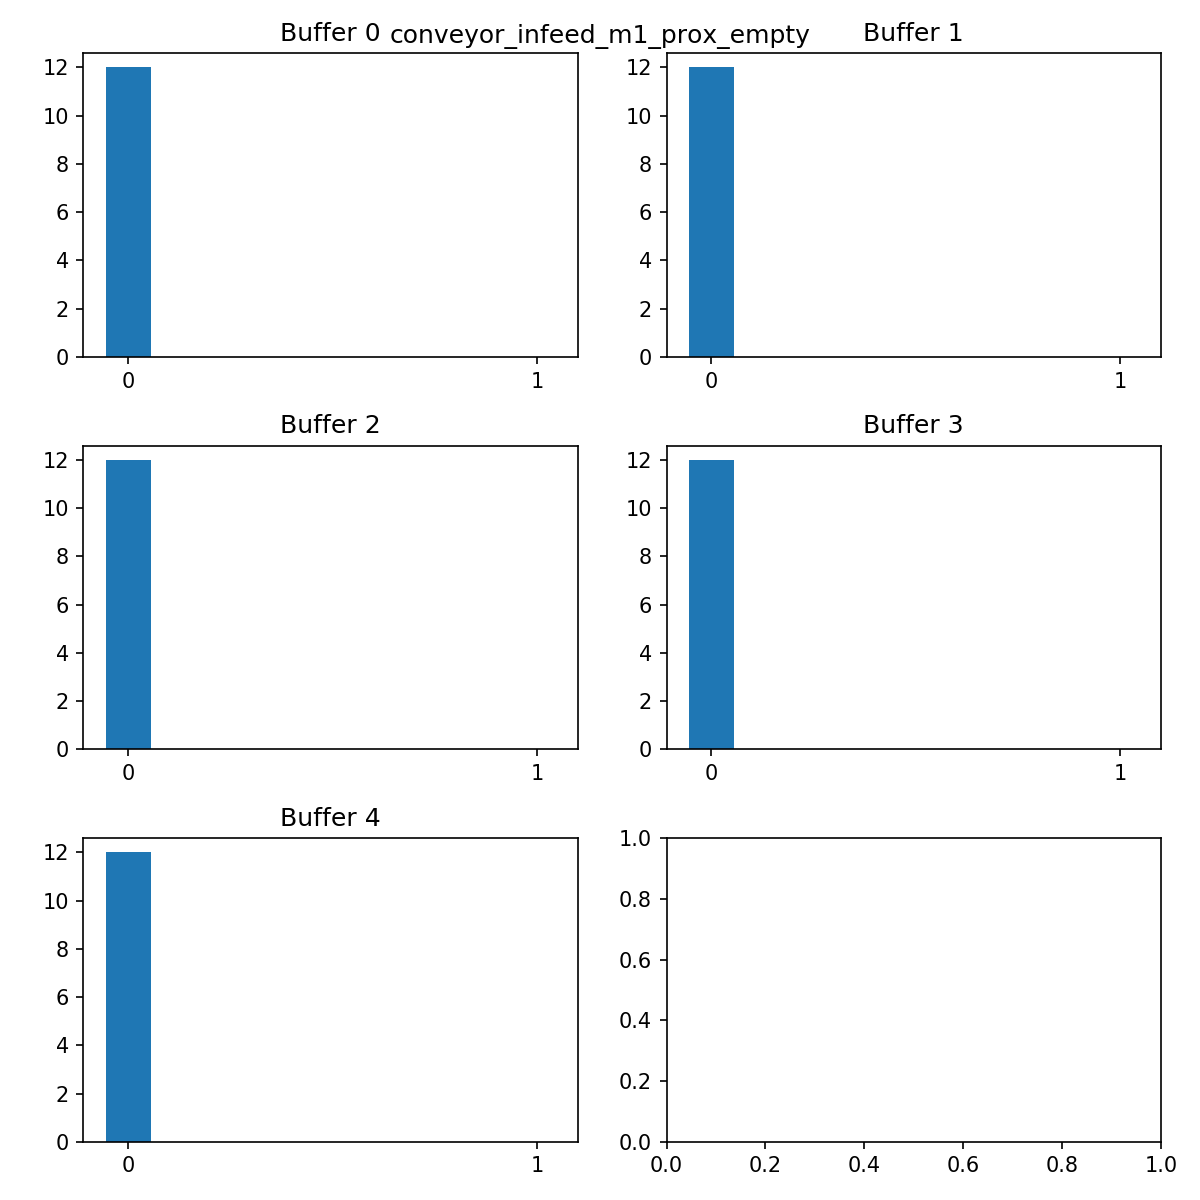

In [20]:
# machine proxes
prox = np.array(single_episode_df["conveyor_infeed_m1_prox_empty"].to_list())
fig, axes = plt.subplots(3, 2, figsize=(8,8))
for i in range(5):
    ax = axes[i//2,i%2]
    ax.hist(prox[:,i], range=[-0, 1.1], align="left")
    ax.set_title(f"Buffer {i}")
    ax.set_xticks([0, 1])
fig.suptitle('conveyor_infeed_m1_prox_empty')
plt.tight_layout()

<IPython.core.display.Javascript object>


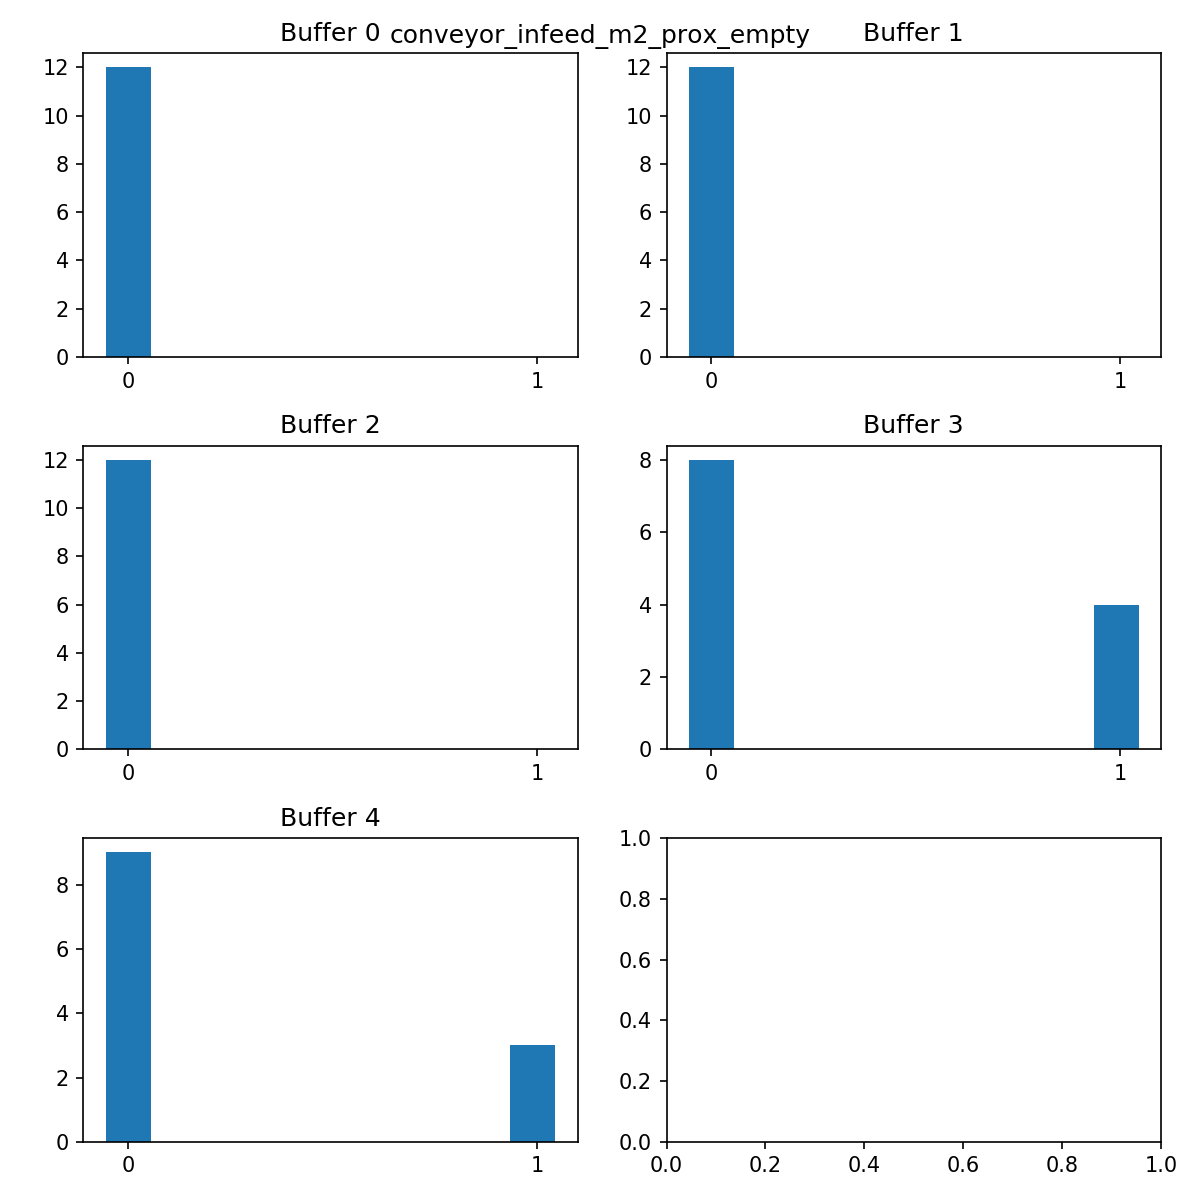

In [21]:
# machine proxes
prox = np.array(single_episode_df["conveyor_infeed_m2_prox_empty"].to_list())
fig, axes = plt.subplots(3, 2, figsize=(8,8))
for i in range(5):
    ax = axes[i//2,i%2]
    ax.hist(prox[:,i], range=[-0, 1.1], align="left")
    ax.set_title(f"Buffer {i}")
    ax.set_xticks([0, 1])
fig.suptitle('conveyor_infeed_m2_prox_empty')
plt.tight_layout()

<IPython.core.display.Javascript object>


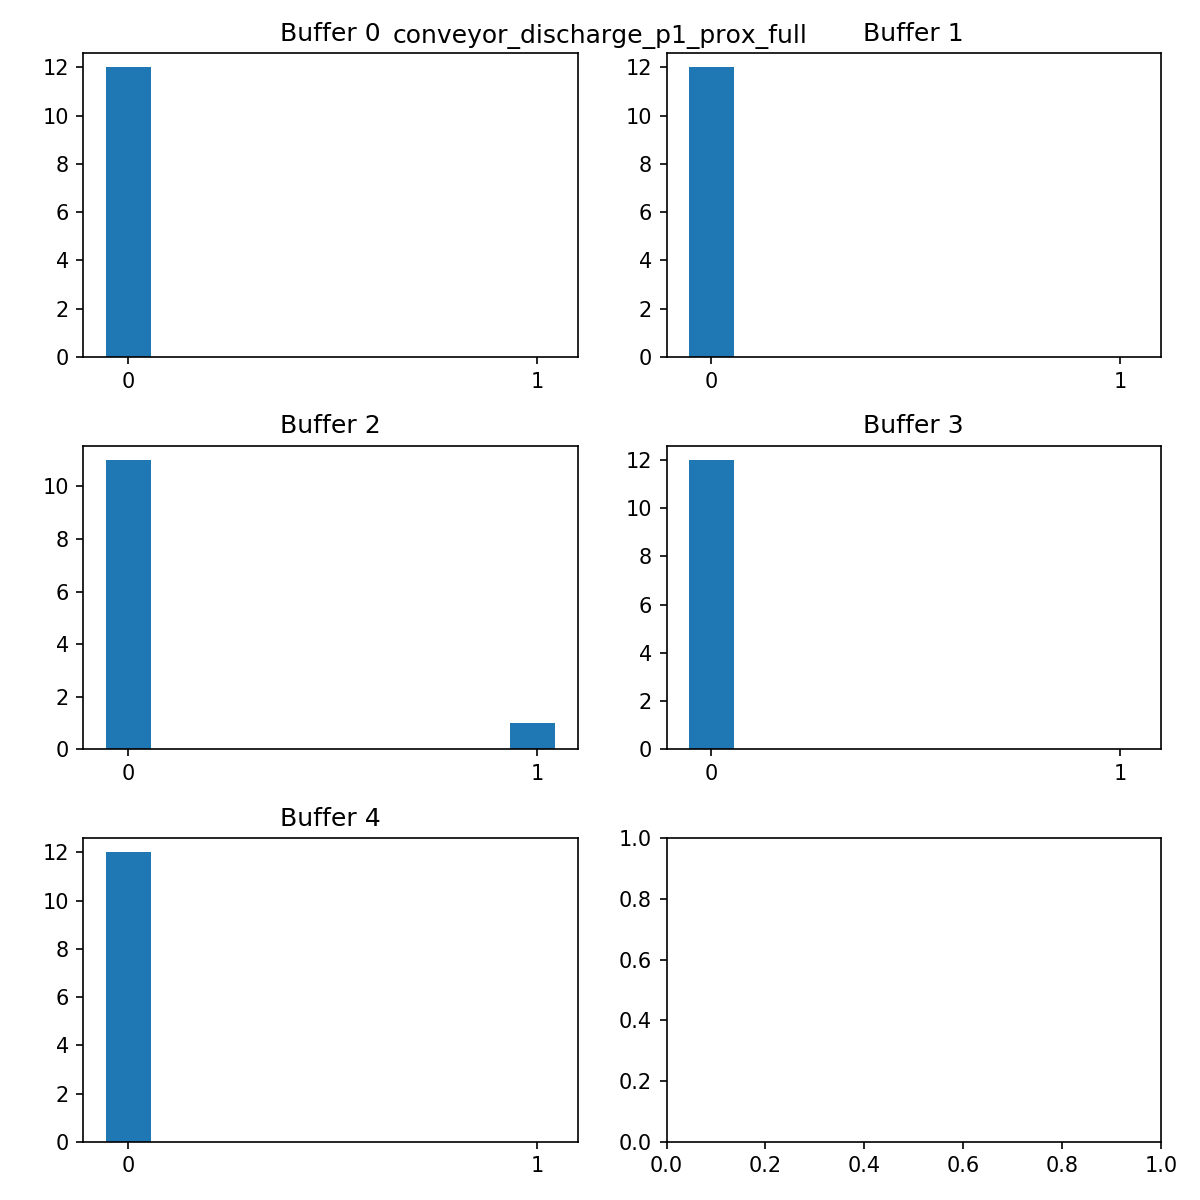

In [22]:
# machine proxes
prox = np.array(single_episode_df["conveyor_discharge_p1_prox_full"].to_list())
fig, axes = plt.subplots(3, 2, figsize=(8,8))
for i in range(5):
    ax = axes[i//2,i%2]
    ax.hist(prox[:,i], range=[-0, 1.1], align="left")
    ax.set_title(f"Buffer {i}")
    ax.set_xticks([0, 1])
fig.suptitle('conveyor_discharge_p1_prox_full')
plt.tight_layout()

<IPython.core.display.Javascript object>


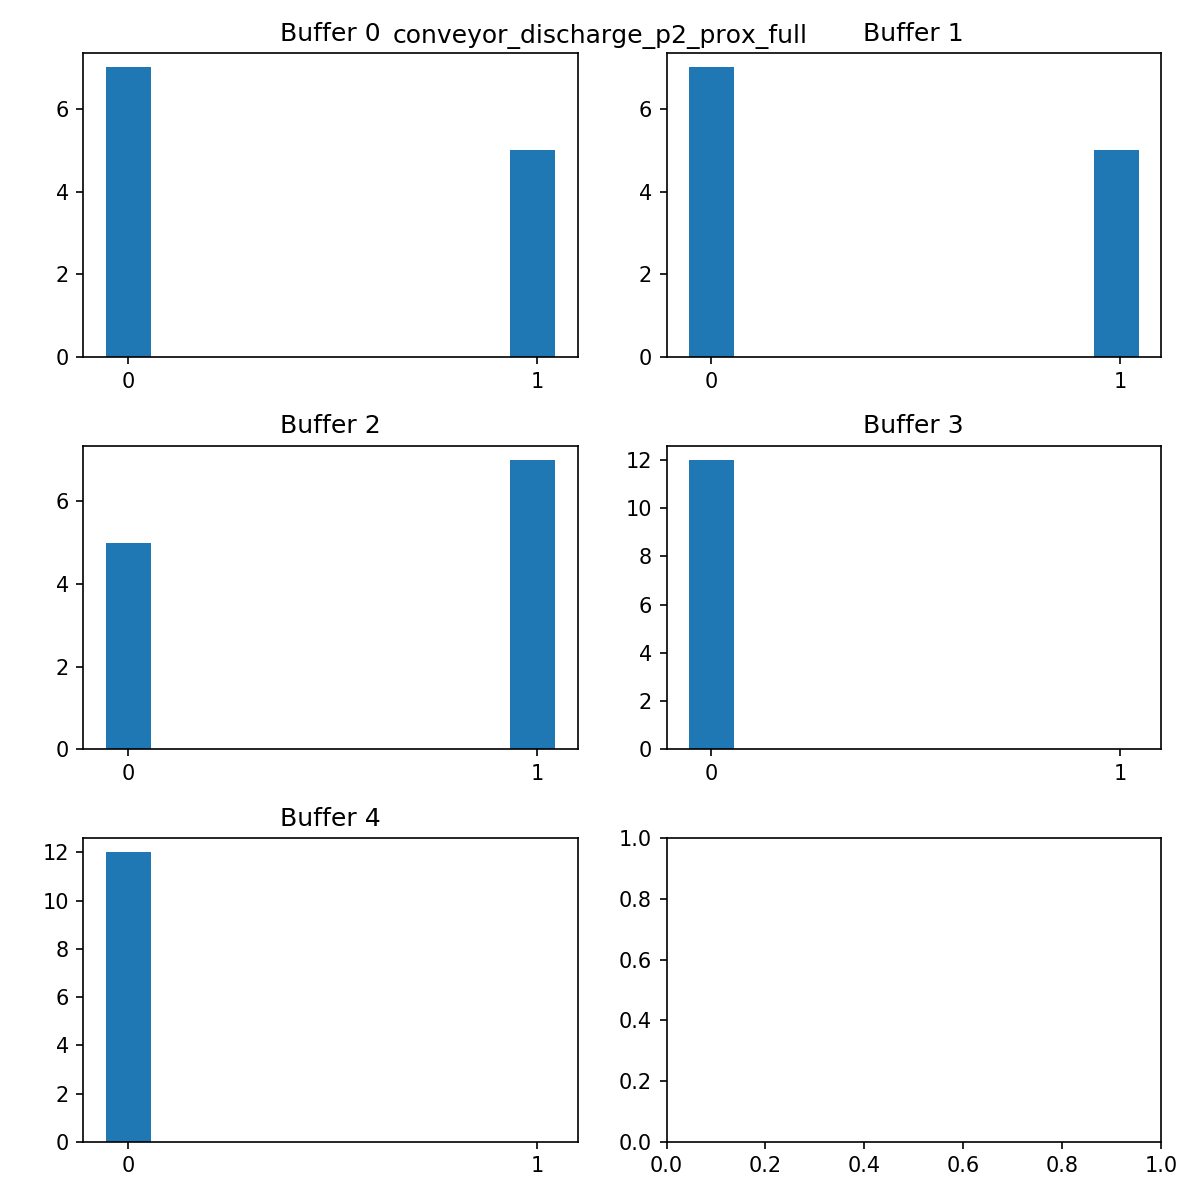

In [23]:
# machine proxes
prox = np.array(single_episode_df["conveyor_discharge_p2_prox_full"].to_list())
fig, axes = plt.subplots(3, 2, figsize=(8,8))
for i in range(5):
    ax = axes[i//2,i%2]
    ax.hist(prox[:,i], range=[-0, 1.1], align="left")
    ax.set_title(f"Buffer {i}")
    ax.set_xticks([0, 1])
fig.suptitle('conveyor_discharge_p2_prox_full')
plt.tight_layout()

# Steady state analysis

In [24]:
def determine_steady_state_index(signal, threshold, moving_average=False):
    if moving_average:
        moving_average_width = 4
        signal = np.convolve(signal, np.ones(moving_average_width), 'valid') / moving_average_width
    # we expect the derivative of the signal to be close to zero during steady state
    diff_arr = np.diff(signal)
    filtered_arr = (diff_arr <= threshold) & (diff_arr >= -threshold)
    # find the last index when the derivate was large, which will give us the index our signal reached steady state
    false_indices = np.argwhere(filtered_arr == False)
    last_index = false_indices[-1]
    # add 1 to the index because we actually want the first "True" after "False" as it marks the start of the steady state
    return last_index[0] + 1

In [25]:
derivative_threshold = 0.1 # threshold to determine how much deviation from a constant value is allowed to call it steady state
steady_state_indices = []
for i in range(machines_speeds.shape[1]):
    index = determine_steady_state_index(machines_speeds[:,1], derivative_threshold, True)
    steady_state_indices.append(index)
steady_state_index = max(steady_state_indices)

In [26]:
print(f"steady state is reached at iteration {steady_state_index}")
print(f"it takes {(steady_state_index/machines_speeds.shape[0] * 100):.2f} % of time to reach steady state")
print(f"it spends {(100 - steady_state_index/machines_speeds.shape[0] * 100):.2f} % of time in steady state")

steady state is reached at iteration 7
it takes 58.33 % of time to reach steady state
it spends 41.67 % of time in steady state
